In [14]:
import json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from Tests import Tests
import scipy.optimize as opt

In [15]:
f =open("speeches.json")
data = json.load(f)
df = pd.DataFrame(data)

In [16]:
# add presidents' birthdays
birthdays = {
"John Quincy Adams": "1767-07-11",
"Millard Fillmore": "1800-01-07",
"Lyndon B. Johnson": "1908-08-27",
"Joe Biden": "1942-11-20",
"Grover Cleveland": "1837-03-18",
"James K. Polk": "1795-11-02",
"William Taft": "1857-09-15",
"James Buchanan": "1791-04-23",
"Ulysses S. Grant": "1822-04-27",
"Zachary Taylor": "1784-11-24",
"Rutherford B. Hayes": "1822-10-04",
"George W. Bush": "1946-07-06",
"George Washington": "1732-02-22",
"Warren G. Harding": "1865-11-02",
"Abraham Lincoln": "1809-02-12",
"James Madison": "1751-03-16",
"Herbert Hoover": "1874-08-10",
"Franklin Pierce": "1804-11-23",
"John Adams": "1735-10-30",
"John F. Kennedy": "1917-05-29",
"Andrew Jackson": "1767-03-15",
"John Tyler": "1790-03-29",
"Chester A. Arthur": "1829-10-05",
"Gerald Ford": "1913-07-15",
"Woodrow Wilson": "1856-12-28",
"William Harrison": "1773-02-09",
"Franklin D. Roosevelt": "1882-01-30",
"Theodore Roosevelt": "1858-10-27",
"Dwight D. Eisenhower": "1890-10-14",
"Donald Trump": "1946-06-14",
"Calvin Coolidge": "1872-07-04",
"William McKinley": "1843-01-29",
"Barack Obama": "1961-08-04",
"Ronald Reagan": "1911-02-06",
"Richard M. Nixon": "1913-01-09",
"James A. Garfield": "1831-11-19",
"Harry S. Truman": "1884-05-08",
"James Monroe": "1758-04-28",
"Andrew Johnson": "1808-12-29",
"Martin Van Buren": "1782-12-05",
"Bill Clinton": "1946-08-19",
"Jimmy Carter": "1924-10-01",
"George H. W. Bush": "1924-06-12",
"Benjamin Harrison": "1833-08-20",
"Thomas Jefferson": "1743-04-13",
}


df["dateofbirth"]= [birthdays[president] for president in df["president"]]

In [17]:
def getAge(df):
    dfdates = pd.DataFrame({
        'dateos': pd.to_datetime(df['date'], utc=True),
        'dateob': pd.to_datetime(df['dateofbirth'])
    })

    # remove time stamp
    dfdates["date"] = pd.to_datetime([date.date() for date in dfdates["dateos"]])

    # Calculate the number of days between the two dates
    dfdays = (dfdates['date'] - dfdates['dateob']).dt.days

    dfyrs = dfdays/365.25
    df_years = np.array([math.floor(age) for age in dfyrs])

    return df_years

df["age"] = getAge(df)

In [18]:
df["CLI"] = np.array([Tests.CLI(Tests(df["transcript"][i])) for i in range(len(df))])
df["FogCount"] = np.array([Tests.FOGC(Tests(df["transcript"][i])) for i in range(len(df))])
df["DaleChall"] = np.array([Tests.DaleChall(Tests(df["transcript"][i])) for i in range(len(df))])

[-0.01909845  9.8421574 ] [0.00391526 0.22866291]


Text(0, 0.5, 'DaleChall')

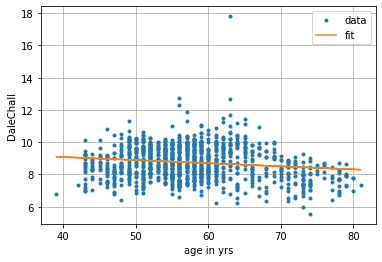

In [19]:
def linear_fit(x, m , t):
    return m*x+t

popt, pcov = opt.curve_fit(linear_fit, df["age"], df["DaleChall"])
perr = np.sqrt(np.diag(pcov))

print(popt, perr)


plt.figure()
plt.plot(df["age"], df["DaleChall"], label="data", linestyle="", marker=".")
plt.plot(df["age"], linear_fit(df["age"], *popt), label="fit")
plt.grid()
plt.legend()
plt.xlabel("age in yrs")
plt.ylabel("DaleChall")

[-0.10729289 22.26817389] [0.01944364 1.1355657 ]


Text(0, 0.5, 'Fog Count')

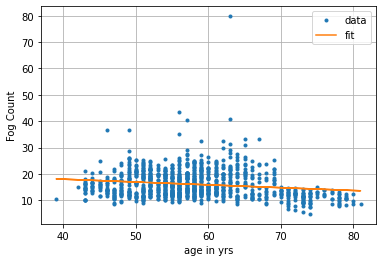

In [20]:
popt, pcov = opt.curve_fit(linear_fit, df["age"], df["FogCount"])
perr = np.sqrt(np.diag(pcov))

print(popt, perr)


plt.figure()
plt.plot(df["age"], df["FogCount"], label="data", linestyle="", marker=".")
plt.plot(df["age"], linear_fit(df["age"], *popt), label="fit")
plt.grid()
plt.legend()
plt.xlabel("age in yrs")
plt.ylabel("Fog Count")

[-0.02672576 12.78124668] [0.00605159 0.35343076]


Text(0, 0.5, 'CLI')

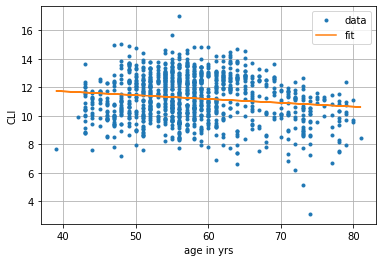

In [21]:
popt, pcov = opt.curve_fit(linear_fit, df["age"], df["CLI"])
perr = np.sqrt(np.diag(pcov))

print(popt, perr)


plt.figure()
plt.plot(df["age"], df["CLI"], label="data", linestyle="", marker=".")
plt.plot(df["age"], linear_fit(df["age"], *popt), label="fit")
plt.grid()
plt.legend()
plt.xlabel("age in yrs")
plt.ylabel("CLI")